<a href="https://colab.research.google.com/github/risker93/Hello_World/blob/main/daily/2021_07_07_%EC%9E%90%EC%97%B0%EC%96%B4%EC%8B%A4%EC%8A%B5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#데이터 불러오기

In [1]:
!git clone https://github.com/SOMJANG/Mecab-ko-for-Google-Colab.git

Cloning into 'Mecab-ko-for-Google-Colab'...
remote: Enumerating objects: 91, done.
remote: Counting objects: 100% (91/91), done.
remote: Compressing objects: 100% (85/85), done.
remote: Total 91 (delta 43), reused 22 (delta 6), pack-reused 0
Unpacking objects: 100% (91/91), done.


In [2]:
ls

Mecab-ko-for-Google-Colab/  sample_data/


In [3]:
cd Mecab-ko-for-Google-Colab/

/content/Mecab-ko-for-Google-Colab


In [4]:
ls

images/                                    LICENSE
install_mecab-ko_on_colab190912.sh         README.md
install_mecab-ko_on_colab_light_210108.sh


In [5]:
!bash install_mecab-ko_on_colab190912.sh

Installing konlpy.....
     |████████████████████████████████| 19.4MB 1.4MB/s 
     |████████████████████████████████| 92kB 9.8MB/s 
     |████████████████████████████████| 450kB 36.6MB/s 
  Found existing installation: beautifulsoup4 4.6.3
    Uninstalling beautifulsoup4-4.6.3:
      Successfully uninstalled beautifulsoup4-4.6.3
Done
Installing mecab-0.996-ko-0.9.2.tar.gz.....
from https://bitbucket.org/eunjeon/mecab-ko/downloads/mecab-0.996-ko-0.9.2.tar.gz
--2021-07-07 00:33:14--  https://bitbucket.org/eunjeon/mecab-ko/downloads/mecab-0.996-ko-0.9.2.tar.gz
Resolving bitbucket.org (bitbucket.org)... 104.192.141.1, 2406:da00:ff00::6b17:d1f5, 2406:da00:ff00::22c2:513, ...
Connecting to bitbucket.org (bitbucket.org)|104.192.141.1|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://bbuseruploads.s3.amazonaws.com/eunjeon/mecab-ko/downloads/mecab-0.996-ko-0.9.2.tar.gz?Signature=E6VUh4UwR7rQMw%2BmXkKM8tmQiXs%3D&Expires=1625619768&AWSAccessKeyId=AKIA6KOSE3BN

In [6]:
!pip install konlpy

In [8]:
from konlpy.tag import Mecab

In [9]:
mecab = Mecab()

In [10]:
print(mecab.morphs('자연어처리가너무재밌어서밥먹는것도가끔까먹어요'))

['자연어', '처리', '가', '너무', '재밌', '어서', '밥', '먹', '는', '것', '도', '가끔', '까먹', '어요']


In [11]:
import os
import matplotlib.pyplot as plt
import tensorflow as tf
import numpy as np

In [12]:
!pwd # 현재위치

/content/Mecab-ko-for-Google-Colab


In [13]:
cd ../ #상위폴더로 이동

/content


In [14]:
path_to_file = '/content/drive/MyDrive/korean-english-park.train.ko'

In [15]:
with open(path_to_file, "r", encoding="UTF-8") as f:
  raw = f.read().splitlines()

In [19]:
print("Data Size", len(raw))
print("Example")
for sen in raw[0:100][::20]: print(">>",sen)

Data Size 94123
Example
>> 개인용 컴퓨터 사용의 상당 부분은 "이것보다 뛰어날 수 있느냐?"
>> 북한의 핵무기 계획을 포기하도록 하려는 압력이 거세지고 있는 가운데, 일본과 북한의 외교관들이 외교 관계를 정상화하려는 회담을 재개했다.
>> "경호 로보트가 침입자나 화재를 탐지하기 위해서 개인적으로, 그리고 전문적으로 사용되고 있습니다."
>> 수자원부 당국은 논란이 되고 있고, 막대한 비용이 드는 이 사업에 대해 내년에 건설을 시작할 계획이다.
>> 또한 근력 운동은 활발하게 걷는 것이나 최소한 20분 동안 뛰는 것과 같은 유산소 활동에서 얻는 운동 효과를 심장과 폐에 주지 않기 때문에, 연구학자들은 근력 운동이 심장에 큰 영향을 미치는지 여부에 대해 논쟁을 해왔다.


In [21]:
print(len(raw[0]))
print(type(raw))

36
<class 'list'>


# 데이터 정제하기

In [22]:
min_len = 999
max_len = 0
sum_len = 0

for sen in raw:
  length = len(sen)
  if min_len > length: min_len = length
  if max_len < length: max_len = length
  sum_len += length

print("문장의 최단길이 : ", min_len)
print("문장의 최장길이 : ", max_len)
print("문장의 평균길이 : ", sum_len//len(raw))

문장의 최단길이 :  1
문장의 최장길이 :  377
문장의 평균길이 :  60


Text(0.5, 1.0, 'Sentence Length Distribution')

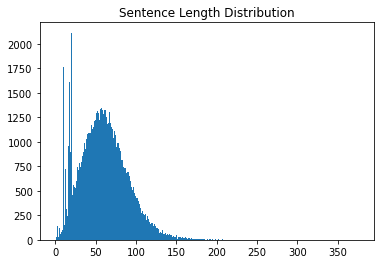

In [23]:
sentence_length = np.zeros((max_len), dtype=np.int)
for sen in raw:
  sentence_length[len(sen)-1] +=1

plt.bar(range(max_len), sentence_length, width=1.0)
plt.title("Sentence Length Distribution")

In [24]:
def check_sentence_with_length(raw, length):
  count = 0
  for sen in raw:
    if len(sen) == length:
      print(sen)
      count += 1
      if count > 100: return

In [32]:
check_sentence_with_length(raw, 1)

’


In [33]:
for idx, _sum in enumerate(sentence_length):
  if _sum > 1500:
    print("Qutlier index: ", idx+1)

Qutlier index:  11
Qutlier index:  19
Qutlier index:  21


In [36]:
check_sentence_with_length(raw, 11)

라고 조던이 말했다.
- 모르고 있습니다.
- 네, 보이는군요.
디즈니사만이 아니다.
큰 파티는 아니지요.
의자는 비어 있었다.
이 일은 계속됩니다.
나는 크게 실망했다.
그 이유는 간단하다.
이력서와 자기 소개서
시대가 변하고 있다.
는 돌발질문을 했다.
9. 몇 분간의 명상
하와이, 빅 아일랜드
키스를 잘 하는 방법
키스를 잘 하는 방법
스피어스가 뚱뚱한가?
산 위를 나는 느낌.
세 시간쯤 걸었을까?
(아직 읽고있습니까?
처음에는 장난이었다.
우리는 운이 좋았다.
아기가 숨을 멈출 때
건물 전체 무너져내려
그녀의 아름다운 눈.
대답은 다음과 같다.
"사과할 것이 없다.
폭탄테러가 공포 유발
그는 "잘 모르겠다.
그는 "잘 모르겠다.
그는 "잘 모르겠다.
그는 "잘 모르겠다.
그는 "잘 모르겠다.
그는 "잘 모르겠다.
그는 "잘 모르겠다.
그는 "잘 모르겠다.
그는 "잘 모르겠다.
케냐 야생동물 고아원
경유 1200원대로…
더 내려야 하는 이유
케냐 야생동물 고아원
경유 1200원대로…
더 내려야 하는 이유
케냐 야생동물 고아원
경유 1200원대로…
더 내려야 하는 이유
케냐 야생동물 고아원
경유 1200원대로…
더 내려야 하는 이유
케냐 야생동물 고아원
경유 1200원대로…
더 내려야 하는 이유
케냐 야생동물 고아원
경유 1200원대로…
더 내려야 하는 이유
케냐 야생동물 고아원
경유 1200원대로…
더 내려야 하는 이유
케냐 야생동물 고아원
경유 1200원대로…
더 내려야 하는 이유
케냐 야생동물 고아원
경유 1200원대로…
더 내려야 하는 이유
케냐 야생동물 고아원
경유 1200원대로…
더 내려야 하는 이유
케냐 야생동물 고아원
경유 1200원대로…
더 내려야 하는 이유
케냐 야생동물 고아원
경유 1200원대로…
더 내려야 하는 이유
케냐 야생동물 고아원
경유 1200원대로…
더 내려야 하는 이유
케냐 야생동물 고아원
경유 1200원대로…
더 내려야 하는 이유
케냐 야생동물 고아원
경유 1200원대로…
더 내려야 하는 이유
케냐 야생동물 고아원
경유 1

In [37]:
min_len = 999
max_len = 0
sum_len = 0

cleaned_corpus = list(set(raw))
print("Data Size: ", len(cleaned_corpus))

for sen in cleaned_corpus:
  length - len(sen)
  if min_len > length: min_len = length
  if max_len < length: max_len = length
  sum_len += length

print("문장의 최단길이: ",min_len)
print("문장의 최장길이: ", max_len)
print("문장의 평균길이: ", sum_len//len(cleaned_corpus))

Data Size:  77591
문장의 최단길이:  58
문장의 최장길이:  58
문장의 평균길이:  58


In [38]:
check_sentence_with_length(cleaned_corpus, 11)

대답은 다음과 같다.
대통령 후보자의 지명
작은 못이 아닙니다.
는 돌발질문을 했다.
미래의 최첨단 사무실
천재 소녀의 '부활'
를 외치며 기뻐했다.
지하철 타기 겁난다.
(아직 읽고있습니까?
raft 다수, 다량
키스를 잘 하는 방법
이력서와 자기 소개서
시대가 변하고 있다.
좀 더 말씀해주시죠.
세 시간쯤 걸었을까?
정권을 잡다[장악하다
처음에는 장난이었다.
brisk 활기를 띤
큰 파티는 아니지요.
크라이슬러. 조업중단
더 내려야 하는 이유
제발 답변을 주세요!
9. 몇 분간의 명상
전유를 넣은 카페라떼
디즈니사만이 아니다.
그 이유는 간단하다.
라고 조던이 말했다.
사업의) 합병, 합동
조금은 새침한 샬롯？
우리는 운이 좋았다.
본서, 본부, 사령부
"사과할 것이 없다.
하와이, 빅 아일랜드
그는 "잘 모르겠다.
남한의 객관적 평가?
resign 사퇴하다
아기가 숨을 멈출 때
이전 보기 다음 보기
- 네, 보이는군요.
로그인 Korea사전
케냐 야생동물 고아원
건물 전체 무너져내려
원문기사 원문기사보기
(정당의) 원내 총무
경유 1200원대로…
의자는 비어 있었다.
외교통상부 이슬람교도
standard 표준
Congress 의회
미래 동맹 정책 구상
원화 강세 언제까지?
고 소식통이 전했다.
그들은 신중했습니다.
- 모르고 있습니다.
levee 제방, 둑
나는 크게 실망했다.
산 위를 나는 느낌.
그녀의 아름다운 눈.
끌어내다, 철수시키다
tribunal 법정
폭탄테러가 공포 유발
스피어스가 뚱뚱한가?
hearing 청문회
pledge 서약하다
비관적인, 염세주의의
이 일은 계속됩니다.
meantime 한편


#Encoding

Text(0.5, 1.0, 'Sentence Leng')

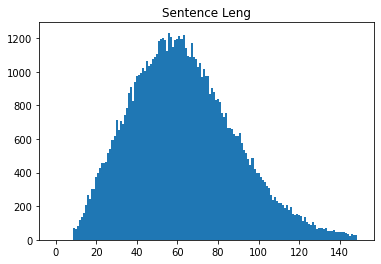

In [42]:
max_len = 150
min_len = 10

filtered_corpus = [s for s in cleaned_corpus if (len(s)< max_len) & (len(s)>= min_len)]

sentence_length = np.zeros((max_len), dtype=np.int)

for sen in filtered_corpus:
  sentence_length[len(sen)-1] +=1

plt.bar(range(max_len), sentence_length, width =1.0)
plt.title("Sentence Leng")

## 공백 기반 토큰화

In [50]:
def tokenize(corpus):
  import tensorflow as tf
  tokenizer = tf.keras.preprocessing.text.Tokenizer(filters='')
  tokenizer.fit_on_texts(corpus)

  tensor = tokenizer.texts_to_sequences(corpus)
  tensor = tf.keras.preprocessing.sequence.pad_sequences(tensor, padding="post")
  return tensor, tokenizer

In [51]:
# 정제된 데이터를 공백 기반으로 토큰화하여 저장하는 코드를 직접 작성해 보세요
split_corpus = []

for kor in filtered_corpus:
  # 코드를 작성하세요.
  split_corpus.append(kor.split())

In [52]:
split_tensor, split_tokenizer = tokenize(split_corpus)

In [56]:
print("Split Vocab Size:" ,len(split_tokenizer.index_word))

Split Vocab Size: 238086


In [55]:
split_tensor, split_tokenizer = tokenize(filtered_corpus)
print("Split Vocab Size:", len(split_tokenizer.index_word))

Split Vocab Size: 238086


In [57]:
for idx, word in enumerate(split_tokenizer.word_index):
  print(idx, ":", word)

  if idx > 10: break

0 : 이
1 : 밝혔다.
2 : 있다.
3 : 말했다.
4 : 수
5 : 있는
6 : 그는
7 : 대한
8 : 위해
9 : 전했다.
10 : 지난
11 : 이번


In [58]:
## 밝 + 혔다 // 밝+히다, 밝+다
# 공백 기반으로 토큰화를 하면 의미가 애매한 것들이 생김

##형태소 토큰화

In [59]:
# 위에서 사용된 코드를 사용해 Mecab 단어 사전을 만들어 보세요
# Hint mecab.morphs()를 사용해서 형태소분석을 합니다.

def mecab_split(sentence):
  # 코드를 작성하세요
  return mecab.morphs(sentence)

mecab_corpus=[]

for kor in filtered_corpus:
  #코드를 작성 하세요.
  mecab_corpus.append(mecab_split(kor))

In [60]:
mecab_tensor, mecab_tokenizer = tokenize(mecab_corpus)
print("MeCab Vocab Size :",len(mecab_tokenizer.index_word))

MeCab Vocab Size : 52279


In [ ]:
mecab_corpus[0]

위 까지의 과정을 인코딩이라고 한다.

복구하는 디코딩을 해보자

#Decoding(Detokenizer)

1.   항목 추가
2.   항목 추가



1. tokenizer.sequences_to_texts() 함수를 사용하여 Decoding
2. tokenizer.index_word를 사용하여 Decoding

두가지 방법을 사용하여 mecab_tensor[100]을 원문으로 되돌려 봅시다(여기서 띄어쓰기는 고려하지 않습니다.)

In [108]:
mecab_tensor

array([[ 8757,     3, 24992, ...,     0,     0,     0],
       [  182,     9,  1192, ...,     0,     0,     0],
       [ 1423,     6,   524, ...,     0,     0,     0],
       ...,
       [ 1753,     6,  4210, ...,     0,     0,     0],
       [  398,  2226,  2433, ...,     0,     0,     0],
       [    3,     7,   383, ...,     0,     0,     0]], dtype=int32)

In [106]:
[mecab_tensor[100]]

[array([ 4087,  6985,   225,     6, 32458,   244,    29,    28,    70,
           55,    27,   273,  1408,    28,  1491,   184,    27,     6,
          258,   894,     5,  1050,    10,     4,   519,     5,   959,
           10,    31,  3021,   583,   269,   225,   137,     6,   507,
          255,   117,     7, 20711,    15, 17957,     2,     1,     0,
            0,     0,     0,     0,     0,     0,     0,     0,     0,
            0,     0,     0,     0,     0,     0,     0,     0,     0,
            0,     0,     0,     0,     0,     0,     0,     0,     0,
            0,     0,     0,     0,     0,     0,     0,     0,     0,
            0,     0,     0,     0], dtype=int32)]

In [103]:
# Case 1 : mecab_tokenizer.sequences_to_texts()

texts = mecab_tokenizer.sequences_to_texts([mecab_tensor[100]])


In [104]:
texts

['미시 건주 상원 의 회가 20 일 ( 현지 시간 ) 민주당 프라이머리 ( 예비 선거 ) 의 새로운 일정 을 제시 하 는 법안 을 제출 하 지 못해 힐러리 클린턴 상원 의원 의 백악관 입 성 에 적신호 가 켜졌 다 .']

In [107]:
# Case 2 : mecab_tokenizer.index_word

sentence = " "
for w in mecab_tensor[100]:
  if w == 0: continue
  sentence += mecab_tokenizer.index_word[w] + " "

print(sentence)

 미시 건주 상원 의 회가 20 일 ( 현지 시간 ) 민주당 프라이머리 ( 예비 선거 ) 의 새로운 일정 을 제시 하 는 법안 을 제출 하 지 못해 힐러리 클린턴 상원 의원 의 백악관 입 성 에 적신호 가 켜졌 다 . 


#BPE Algorithm

In [13]:
import re, collections

In [14]:
num_merges = 10 # BPE를 몇 회 수행할 것인지 정함.

In [28]:
dictionary = {'l o w </w>' : 5,
              'l o w e r </w>' : 2,
              'n e w e s t </w>' : 6,
              'w i d e s t </w>' :3
}

- n-gram 
  - unigram
  - bigram
  - trigram

l o w e s t 라는 단어가 있다고 가정

l 
o 
w 
e 
s 
t 

유니그램이라면 이런식으로 짤리게 됨

bigram으로 짤리면

lo 
ow 
we 
es 
st 

trigram이면

low 
owe 
wes 
est 

나는 밥을 먹었어 하지만 배가 고파. 

unigram으로 자르면

나는 
밥을 
먹었어 
하지만 
배가 
고파 

bigram으로 자르면

나는 밥을 

밥을 먹었어 



In [29]:
def get_stats(dictionary):
  # 유니그램의 pair들의 빈도수를 카운트
  pairs = collections.defaultdict(int)
  for word, freq in dictionary.items():
    symbols = word.split()
    for i in range(len(symbols)-1):
      pairs[symbols[i], symbols[i+1]] += freq
  print('현재 pair들의 빈도수 :', dict(pairs))
  return pairs

In [30]:
def merge_dictionary(pair, v_in):
    v_out = {}
    bigram = re.escape(' '.join(pair))
    p = re.compile(r'(?<!\S)' + bigram + r'(?!\S)')
    for word in v_in:
        w_out = p.sub(''.join(pair), word)
        v_out[w_out] = v_in[word]
    return v_out

In [31]:
bpe_codes = {}
bpe_codes_reverse = {}
for i in range(num_merges):
  print(">> Step {0}".format(i+1))
  pairs = get_stats(dictionary)
  best = max(pairs, key=pairs.get)
  dictionary = merge_dictionary(best, dictionary)

  bpe_codes[best] = i
  bpe_codes_reverse[best[0] + best[1]] = best

  print("new merge: {}".format(best))
  print("dictionary: {}".format(dictionary))

>> Step 1
현재 pair들의 빈도수 : {('l', 'o'): 7, ('o', 'w'): 7, ('w', '</w>'): 5, ('w', 'e'): 8, ('e', 'r'): 2, ('r', '</w>'): 2, ('n', 'e'): 6, ('e', 'w'): 6, ('e', 's'): 9, ('s', 't'): 9, ('t', '</w>'): 9, ('w', 'i'): 3, ('i', 'd'): 3, ('d', 'e'): 3}
new merge: ('e', 's')
dictionary: {'l o w </w>': 5, 'l o w e r </w>': 2, 'n e w es t </w>': 6, 'w i d es t </w>': 3}
>> Step 2
현재 pair들의 빈도수 : {('l', 'o'): 7, ('o', 'w'): 7, ('w', '</w>'): 5, ('w', 'e'): 2, ('e', 'r'): 2, ('r', '</w>'): 2, ('n', 'e'): 6, ('e', 'w'): 6, ('w', 'es'): 6, ('es', 't'): 9, ('t', '</w>'): 9, ('w', 'i'): 3, ('i', 'd'): 3, ('d', 'es'): 3}
new merge: ('es', 't')
dictionary: {'l o w </w>': 5, 'l o w e r </w>': 2, 'n e w est </w>': 6, 'w i d est </w>': 3}
>> Step 3
현재 pair들의 빈도수 : {('l', 'o'): 7, ('o', 'w'): 7, ('w', '</w>'): 5, ('w', 'e'): 2, ('e', 'r'): 2, ('r', '</w>'): 2, ('n', 'e'): 6, ('e', 'w'): 6, ('w', 'est'): 6, ('est', '</w>'): 9, ('w', 'i'): 3, ('i', 'd'): 3, ('d', 'est'): 3}
new merge: ('est', '</w>')
dictiona

In [32]:
print(bpe_codes)

{('e', 's'): 0, ('es', 't'): 1, ('est', '</w>'): 2, ('l', 'o'): 3, ('lo', 'w'): 4, ('n', 'e'): 5, ('ne', 'w'): 6, ('new', 'est</w>'): 7, ('low', '</w>'): 8, ('w', 'i'): 9}


#OOV에 대처하기

In [37]:
def get_pairs(word):
  pairs = set()
  prev_char = word[0]
  for char in word[1:]:
    pairs.add((prev_char, char))
    prev_char = char
  return pairs

In [34]:
def encode(orig):
  word = tuple(orig) + ('</w>',)
  print("__word split into characters:__ <tt>{}<tt>".format(word))

  pairs = get_pairs(word)

  if not pairs:
    return orig
  
  iteration = 0
  while True:
    iteration += 1
    print("__Iteration {}:__".format(iteration))

    print("Bigram in the word: {}".format(pairs))
    bigram = min(pairs, key = lambda pair: bpe_codes.get(pair, float('inf')))
    print("candidate for merging: {}".format(bigram))
    if bigram not in bpe_codes:
      print("__Candidate not in BPE merges, algorithm stops.__")
      break
    first, second = bigram
    new_word = []
    i = 0
    while i < len(word):
      try:
        j = word.index(first, i)
        new_word.extend(word[i:j])
        i = j
      except:
        new_word.extend(word[i:])
        break

      if word[i] == first and i < len(word)-1 and word[i+1] == second:
        new_word.append(first+second)
        i += 2
      else:
        new_word.append(word[i])
        i += 1
    new_word = tuple(new_word)
    word = new_word
    print("word after merging : {}".format(word))
    if len(word) == 1:
      break
    else:
      pairs = get_pairs(word)
  
  # 특별토큰인 </w>는 출력하지 않는다.
  if word[-1] == '</w>':
    word = word[:-1]
  elif word[-1].endswith('</w>'):
    word = word[:-1] + (word[-1].replace('</w>', ''),)
  return word

In [38]:
encode("loki")

__word split into characters:__ <tt>('l', 'o', 'k', 'i', '</w>')<tt>
__Iteration 1:__
Bigram in the word: {('i', '</w>'), ('o', 'k'), ('l', 'o'), ('k', 'i')}
candidate for merging: ('l', 'o')
word after merging : ('lo', 'k', 'i', '</w>')
__Iteration 2:__
Bigram in the word: {('i', '</w>'), ('lo', 'k'), ('k', 'i')}
candidate for merging: ('i', '</w>')
__Candidate not in BPE merges, algorithm stops.__


('lo', 'k', 'i')

In [40]:
encode('lowbar')

__word split into characters:__ <tt>('l', 'o', 'w', 'b', 'a', 'r', '</w>')<tt>
__Iteration 1:__
Bigram in the word: {('l', 'o'), ('b', 'a'), ('w', 'b'), ('o', 'w'), ('a', 'r'), ('r', '</w>')}
candidate for merging: ('l', 'o')
word after merging : ('lo', 'w', 'b', 'a', 'r', '</w>')
__Iteration 2:__
Bigram in the word: {('lo', 'w'), ('b', 'a'), ('w', 'b'), ('a', 'r'), ('r', '</w>')}
candidate for merging: ('lo', 'w')
word after merging : ('low', 'b', 'a', 'r', '</w>')
__Iteration 3:__
Bigram in the word: {('low', 'b'), ('b', 'a'), ('r', '</w>'), ('a', 'r')}
candidate for merging: ('low', 'b')
__Candidate not in BPE merges, algorithm stops.__


('low', 'b', 'a', 'r')

사전에 정의되지 않은 단어가 들어올때 어떻게 처리하는지 정도만 알아두고 넘어가자.

#IMDB리뷰 토큰화 하기

In [41]:
import tensorflow_datasets as tfds
import urllib.request
import pandas as pd

In [44]:
urllib.request.urlretrieve("https://raw.githubusercontent.com/LawrenceDuan/IMDb-Review-Analysis/master/IMDb_Reviews.csv", filename="IMDb_Reviews.csv")

('IMDb_Reviews.csv', <http.client.HTTPMessage at 0x7f04e970ee10>)

In [45]:
train_df = pd.read_csv('IMDb_Reviews.csv')

In [47]:
print(train_df)

                                                  review  sentiment
0      My family and I normally do not watch local mo...          1
1      Believe it or not, this was at one time the wo...          0
2      After some internet surfing, I found the "Home...          0
3      One of the most unheralded great works of anim...          1
4      It was the Sixties, and anyone with long hair ...          0
...                                                  ...        ...
49995  the people who came up with this are SICK AND ...          0
49996  The script is so so laughable... this in turn,...          0
49997  "So there's this bride, you see, and she gets ...          0
49998  Your mind will not be satisfied by this nobud...          0
49999  The chaser's war on everything is a weekly sho...          1

[50000 rows x 2 columns]


In [48]:
train_df['review']

0        My family and I normally do not watch local mo...
1        Believe it or not, this was at one time the wo...
2        After some internet surfing, I found the "Home...
3        One of the most unheralded great works of anim...
4        It was the Sixties, and anyone with long hair ...
                               ...                        
49995    the people who came up with this are SICK AND ...
49996    The script is so so laughable... this in turn,...
49997    "So there's this bride, you see, and she gets ...
49998    Your mind will not be satisfied by this nobud...
49999    The chaser's war on everything is a weekly sho...
Name: review, Length: 50000, dtype: object

In [49]:
train_df['sentiment']

0        1
1        0
2        0
3        1
4        0
        ..
49995    0
49996    0
49997    0
49998    0
49999    1
Name: sentiment, Length: 50000, dtype: int64

In [50]:
tokenizer = tfds.deprecated.text.SubwordTextEncoder.build_from_corpus(train_df['review'], target_vocab_size=2**13)

In [52]:
print(tokenizer.subwords[:100])

['the_', ', ', '. ', 'a_', 'and_', 'of_', 'to_', 's_', 'is_', 'br', 'in_', 'I_', 'that_', 'this_', 'it_', ' /><', ' />', 'was_', 'The_', 't_', 'as_', 'with_', 'for_', '.<', 'on_', 'but_', 'movie_', 'are_', ' (', 'have_', 'his_', 'film_', 'not_', 'be_', 'you_', 'ing_', ' "', 'ed_', 'it', 'd_', 'an_', 'at_', 'by_', 'he_', 'one_', 'who_', 'from_', 'y_', 'or_', 'e_', 'like_', 'all_', '" ', 'they_', 'so_', 'just_', 'has_', ') ', 'about_', 'her_', 'out_', 'This_', 'some_', 'movie', 'ly_', 'film', 'very_', 'more_', 'It_', 'what_', 'would_', 'when_', 'if_', 'good_', 'up_', 'which_', 'their_', 'only_', 'even_', 'my_', 'really_', 'had_', 'can_', 'no_', 'were_', 'see_', '? ', 'she_', 'than_', '! ', 'there_', 'been_', 'get_', 'into_', 'will_', ' - ', 'much_', 'n_', 'because_', 'ing']


In [54]:
print(train_df['review'][20])

Pretty bad PRC cheapie which I rarely bother to watch over again, and it's no wonder -- it's slow and creaky and dull as a butter knife. Mad doctor George Zucco is at it again, turning a dimwitted farmhand in overalls (Glenn Strange) into a wolf-man. Unfortunately, the makeup is virtually non-existent, consisting only of a beard and dimestore fangs for the most part. If it were not for Zucco and Strange's presence, along with the cute Anne Nagel, this would be completely unwatchable. Strange, who would go on to play Frankenstein's monster for Unuiversal in two years, does a Lenny impression from "Of Mice and Men", it seems.<br /><br />*1/2 (of Four)


In [56]:
print("토큰화된 샘플 질문: {}".format(tokenizer.encode(train_df['review'][20])))

토큰화된 샘플 질문: [1590, 4162, 132, 7107, 1892, 2983, 578, 76, 12, 4632, 3422, 7, 160, 175, 372, 2, 5, 39, 8051, 8, 84, 2652, 497, 39, 8051, 8, 1374, 5, 3461, 2012, 48, 5, 2263, 21, 4, 2992, 127, 4729, 711, 3, 1391, 8044, 3557, 1277, 8102, 2154, 5681, 9, 42, 15, 372, 2, 3773, 4, 3502, 2308, 467, 4890, 1503, 11, 3347, 1419, 8127, 29, 5539, 98, 6099, 58, 94, 4, 1388, 4230, 8057, 213, 3, 1966, 2, 1, 6700, 8044, 9, 7069, 716, 8057, 6600, 2, 4102, 36, 78, 6, 4, 1865, 40, 5, 3502, 1043, 1645, 8044, 1000, 1813, 23, 1, 105, 1128, 3, 156, 15, 85, 33, 23, 8102, 2154, 5681, 5, 6099, 8051, 8, 7271, 1055, 2, 534, 22, 1, 3046, 5214, 810, 634, 8120, 2, 14, 71, 34, 436, 3311, 5447, 783, 3, 6099, 2, 46, 71, 193, 25, 7, 428, 2274, 2260, 6487, 8051, 8, 2149, 23, 1138, 4117, 6023, 163, 11, 148, 735, 2, 164, 4, 5277, 921, 3395, 1262, 37, 639, 1349, 349, 5, 2460, 328, 15, 5349, 8127, 24, 10, 16, 10, 17, 8054, 8061, 8059, 8062, 29, 6, 6607, 8126, 8053]


In [59]:
# 리뷰데이터가 아닌 샘플 문장으로 인코딩하고 디코딩해보자!!
sample_string1 = "Never give up. because I don't ever give up"

# 인코딩해서 저장
tokenized_string1 = tokenizer.encode(sample_string1)
print('정수 인코딩 후의 문장: {}'.format(tokenized_string1))

# 이를 다시 디코딩하자
original_string = tokenizer.decode(tokenized_string1)
print('기존 문장: {}'.format(original_string))

정수 인코딩 후의 문장: [4883, 255, 307, 3, 99, 12, 109, 8051, 20, 161, 255, 307]
기존 문장: Never give up. because I don't ever give up


In [60]:
print('단어 집합의 크기(Vocab size): ', tokenizer.vocab_size)

단어 집합의 크기(Vocab size):  8268


In [62]:
for ts in tokenized_string1:
  print('{} ----> {}'.format(ts, tokenizer.decode([ts])))


4883 ----> Never 
255 ----> give 
307 ----> up
3 ----> . 
99 ----> because 
12 ----> I 
109 ----> don
8051 ----> '
20 ----> t 
161 ----> ever 
255 ----> give 
307 ----> up


In [64]:
sample_string = "Never give up. because I don't everxyz give up"

# 인코딩해서 저장
tokenized_string1 = tokenizer.encode(sample_string)
print('정수 인코딩 후의 문장: {}'.format(tokenized_string1))

# 이를 다시 디코딩하자
original_string = tokenizer.decode(tokenized_string1)
print('기존 문장: {}'.format(original_string))

정수 인코딩 후의 문장: [4883, 255, 307, 3, 99, 12, 109, 8051, 20, 791, 8132, 8133, 997, 255, 307]
기존 문장: Never give up. because I don't everxyz give up


In [65]:
for ts in tokenized_string1:
  print('{} ----> {}'.format(ts, tokenizer.decode([ts])))


4883 ----> Never 
255 ----> give 
307 ----> up
3 ----> . 
99 ----> because 
12 ----> I 
109 ----> don
8051 ----> '
20 ----> t 
791 ----> ever
8132 ----> x
8133 ----> y
997 ----> z 
255 ----> give 
307 ----> up


#IMDB리뷰 sentencePiece로 토큰화

참고:https://keep-steady.tistory.com/7?category=702926

In [66]:
pip install sentencepiece

     |████████████████████████████████| 1.2MB 5.3MB/s 


In [70]:
import sentencepiece as spm
import pandas as pd
import urllib.request
import csv

In [71]:
train_df = pd.read_csv('IMDb_Reviews.csv')
train_df['review']

0        My family and I normally do not watch local mo...
1        Believe it or not, this was at one time the wo...
2        After some internet surfing, I found the "Home...
3        One of the most unheralded great works of anim...
4        It was the Sixties, and anyone with long hair ...
                               ...                        
49995    the people who came up with this are SICK AND ...
49996    The script is so so laughable... this in turn,...
49997    "So there's this bride, you see, and she gets ...
49998    Your mind will not be satisfied by this nobud...
49999    The chaser's war on everything is a weekly sho...
Name: review, Length: 50000, dtype: object

In [73]:
print("리뷰 개수 : ", len(train_df))

리뷰 개수 :  50000


In [76]:
with open('imdb_review.txt', 'w', encoding='utf8')as f:
  f.write('\n'.join(train_df['review']))

In [80]:
spm.SentencePieceTrainer.Train('--input=imdb_review.txt --model_prefix=imdb --vocab_size=5000 --model_type=bpe --max_sentence_length=9999')

- input : 학습시킬 파일 
- model_prefix : 만들어질 모델 이름
- vocab_size : 단어집합크기
- model_type : 사용할 모델 (unigram(default), bpe, char, word)
- pad_id, pad_piece : pad token id, 값
- unk_id, unk_piece : unknown token id, 값
- bos_id, bos_piece : begin of sentence token id,값
- eos_id, eos_piece : end of sequence token id, 값
- user_defined_symbols : 사용자 정의 토큰

In [81]:
vocab_list = pd.read_csv('imdb.vocab',sep='\t' ,header=None, quoting=csv.QUOTE_NONE )

In [82]:
vocab_list

,0,1
0,<unk>,0
1,<s>,0
2,</s>,0
3,▁t,0
4,▁a,-1
...,...,...
4995,8,-4992
4996,4,-4993
4997,7,-4994
4998,&,-4995


In [83]:
len(vocab_list)

5000

In [84]:
sp = spm.SentencePieceProcessor()
vocab_file = "imdb.model"
sp.load(vocab_file)

True

In [95]:
lines = [
         "I didnt't at all think of it this way.",
         "I have waited a long time for someone to film"
]
for line in lines:
  print(line)
  print(sp.encode_as_pieces(line)) # 문장을 입력하면 서브워드 시퀌스로 변환
  print(sp.encode_as_ids(line)) # 문장을 입력하면 정수 시퀀스로 변환

I didnt't at all think of it this way.
['▁I', '▁did', 'nt', "'", 't', '▁at', '▁all', '▁think', '▁of', '▁it', '▁this', '▁way', '.']
[41, 325, 279, 4950, 4926, 138, 169, 378, 30, 58, 73, 413, 4945]
I have waited a long time for someone to film
['▁I', '▁have', '▁wa', 'ited', '▁a', '▁long', '▁time', '▁for', '▁someone', '▁to', '▁film']
[41, 141, 1364, 1120, 4, 666, 285, 92, 1078, 33, 91]


In [86]:
sp.GetPieceSize() # 단어집합의 크기

5000

In [87]:
sp.IdToPiece(430) # 정수로부터 매핑되는 서브워드 변환

'▁character'

In [90]:
sp.PieceToId('▁character') # 서브워드로부터 매핑되는 정수로 변환

430

In [93]:
sp.DecodeIds([41, 141, 1364, 1120, 4, 666, 285, 92, 1078, 33, 91])
# 정수 시퀀스로부터 문장으로 변환

'I have waited a long time for someone to film'

In [96]:
# 서브워드 시퀀스로부터 문장으로 변환
sp.DecodePieces(['▁I', '▁have', '▁wa', 'ited', '▁a', '▁long', '▁time', '▁for', '▁someone', '▁to', '▁film'])

'I have waited a long time for someone to film'

In [97]:
print(sp.encode("I have waited a long time for someone to film", out_type=str))
print(sp.encode("I have waited a long time for someone to film", out_type=int))
# encode -> 문장으로부터 인자값에 따라서 정수 시퀀스 또는 서브워드 시퀀스로 변환 가능

['▁I', '▁have', '▁wa', 'ited', '▁a', '▁long', '▁time', '▁for', '▁someone', '▁to', '▁film']
[41, 141, 1364, 1120, 4, 666, 285, 92, 1078, 33, 91]
